### In SAM, Bounding box prompts from an object detector can enable text-to-object segmentation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1. Using YOLOv8 for Object Detection and bounding box generation

In [2]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 9.7 MB/s eta 0:00:00


In [ ]:
# Custom training YOLO model using Custom Dataset

In [3]:
# unzipping dataset
!cp "/content/MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip" "MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip"
!unzip "MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip"

cp: '/content/MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip' and 'MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip' are the same file
Archive:  MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/Y11_jpg.rf.a2927aa6c18c3e171759794c652f7a94.jpg  
 extracting: test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg  
 extracting: test/images/Y16_JPG.rf.96e3fc38718c5f64776810040e63363c.jpg  
 extracting: test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg  
 extracting: test/images/Y29_jpg.rf.307e980d22d7cea7aed340d4f0edc9bc.jpg  
 extracting: test/images/Y33_jpg.rf.f3e7bf77085ecd9dd6c9cfbc268b8fc0.jpg  
 extracting: test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg  
 extracting: test/images/Y49_JPG.rf.f5d86858ea33cd0f3b814c9705d731e5.jpg  
 extracting: test/images/Y53_j

In [19]:
#Training YOLOv8 on a custom dataset
!yolo task = detect mode = train model = yolov8n.pt data = /content/data.yaml epochs = 50 imgsz= 650 project = /content/drive/MyDrive/Brain_Tumor/New_Results

100% 6.23M/6.23M [00:00<00:00, 241MB/s]
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, patience=50, batch=16, imgsz=650, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Brain_Tumor/New_Results, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True

In [ ]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt source = /content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg  project = /content/drive/MyDrive/Brain_Tumor/New_Results

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg: 672x672 1 YES-TUMOR, 9.8ms
Speed: 3.8ms preprocess, 9.8ms inference, 326.6ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Brain_Tumor/New_Results/predict


In [ ]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt source = /content/test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg  project = /content/drive/MyDrive/Brain_Tumor/New_Results

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg: 672x672 1 YES-TUMOR, 9.1ms
Speed: 4.0ms preprocess, 9.1ms inference, 113.5ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Brain_Tumor/New_Results/predict2


In [ ]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt source = /content/test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg  project = /content/drive/MyDrive/Brain_Tumor/New_Results

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg: 672x672 3 YES-TUMORs, 9.0ms
Speed: 3.8ms preprocess, 9.0ms inference, 147.1ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Brain_Tumor/New_Results/predict3


In [ ]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt source = /content/test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg  project = /content/drive/MyDrive/Brain_Tumor/New_Results

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg: 672x672 1 YES-TUMOR, 8.5ms
Speed: 3.7ms preprocess, 8.5ms inference, 133.0ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Brain_Tumor/New_Results/predict4


In [20]:
# Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Brain_Tumor/New_Results/train3/weights/best.pt source = /content/test/images  project = /content/drive/MyDrive/Brain_Tumor/New_Results

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/12 /content/test/images/Y11_jpg.rf.a2927aa6c18c3e171759794c652f7a94.jpg: 672x672 1 YES-TUMOR, 8.4ms
image 2/12 /content/test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg: 672x672 1 YES-TUMOR, 7.8ms
image 3/12 /content/test/images/Y16_JPG.rf.96e3fc38718c5f64776810040e63363c.jpg: 672x672 1 YES-TUMOR, 7.8ms
image 4/12 /content/test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg: 672x672 1 YES-TUMOR, 7.8ms
image 5/12 /content/test/images/Y29_jpg.rf.307e980d22d7cea7aed340d4f0edc9bc.jpg: 672x672 1 YES-TUMOR, 7.8ms
image 6/12 /content/test/images/Y33_jpg.rf.f3e7bf77085ecd9dd6c9cfbc268b8fc0.jpg: 672x672 1 YES-TUMOR, 7.8ms
image 7/12 /content/test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg: 672x672 1 YES-TUMOR, 7.8ms
image 8/12 /content/test/images/Y49_JPG.rf.f5d86858ea33cd0f3b814c9705d731e5.jpg: 672x672

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import math
import os

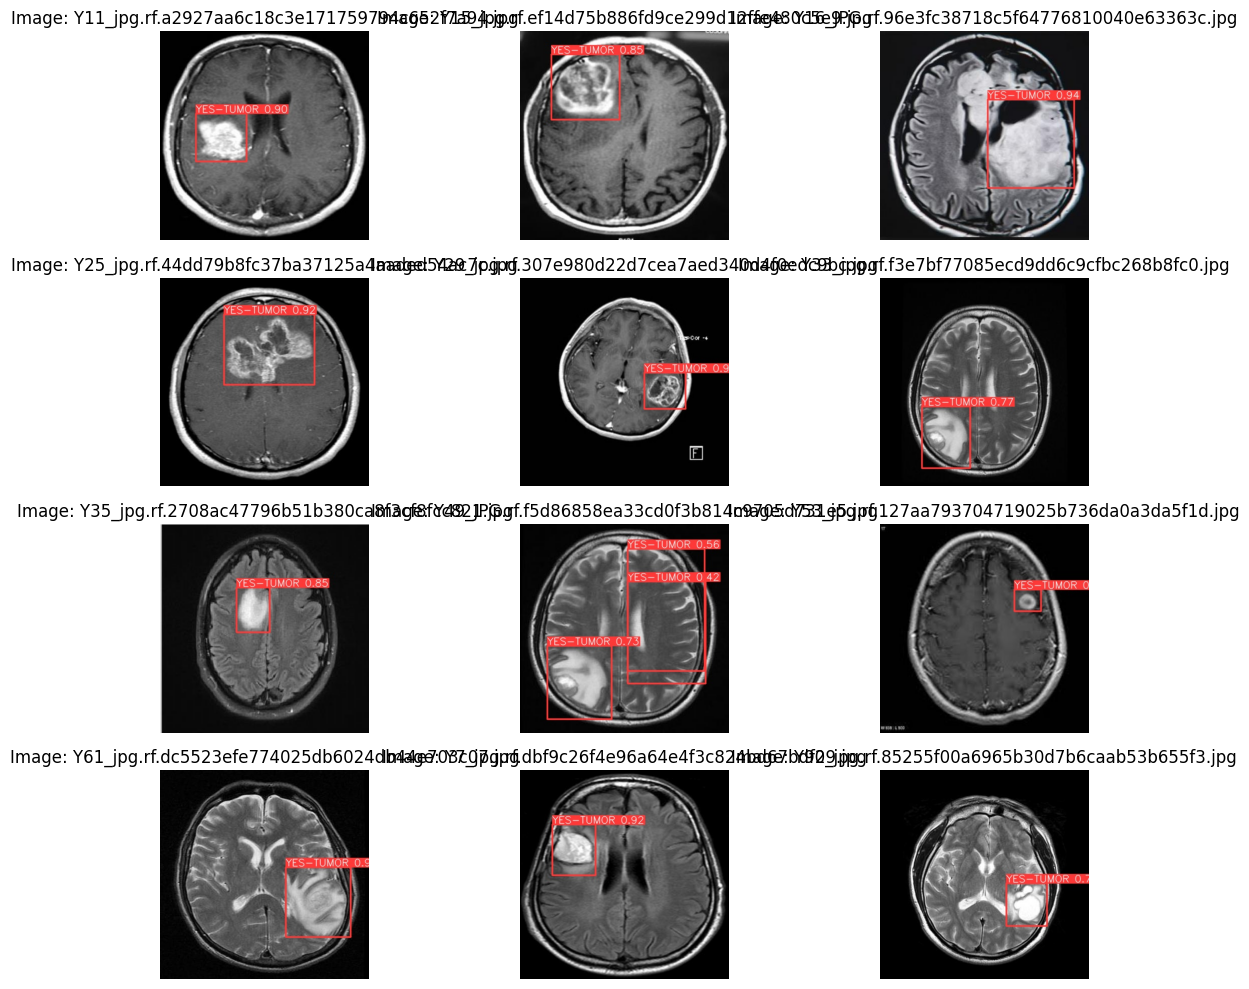

In [21]:
# Plotting the predicted image along with confidence

# Specify the folder containing the images
folder_path = '/content/drive/MyDrive/Brain_Tumor/New_Results/predict6'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

# Define the grid size (rows, columns) for displaying images
rows, cols = 4, 3

# Calculate the total number of grid positions
total_grid_positions = rows * cols

# Create a new figure for displaying the images
plt.figure(figsize=(12, 10))

# Limit the number of images to display based on grid size and maximum (12)
num_images_to_display = min(len(image_files), total_grid_positions, 12)

# Loop through each image file and display it using OpenCV and Matplotlib
for i in range(num_images_to_display):
    image_file = image_files[i]
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    if image is not None:
        # Convert the image from BGR to RGB for proper display using Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Add the image to the grid
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_rgb)
        plt.title(f"Image: {image_file}")
        plt.axis('off')
    else:
        print(f"Error reading image: {image_path}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

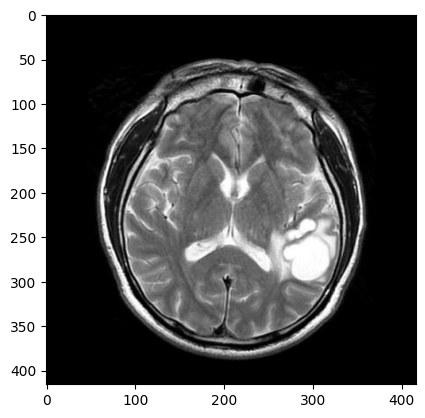

In [ ]:
# input image
original_image = cv2.imread('/content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

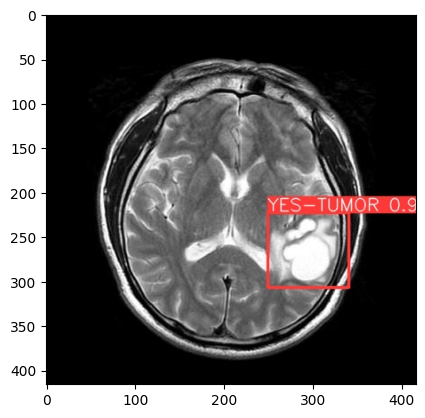

In [ ]:
# Plotting the predicted image along with confidence
predicted_image = cv2.imread('/content/drive/MyDrive/Brain_Tumor/New_Results/predict/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg')
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))

In [ ]:
## loading the custom trained YOLOv8m model
model = YOLO('/content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt')
# Perform inference
results = model('/content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg')
results


image 1/1 /content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg: 672x672 1 YES-TUMOR, 9.1ms
Speed: 3.8ms preprocess, 9.1ms inference, 2.5ms postprocess per image at shape (1, 3, 672, 672)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'YES-TUMOR'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0

In [ ]:
result = results[0]
result.boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[249.2085, 223.7642, 340.9882, 307.4851,   0.9123,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.9123], device='cuda:0')
data: tensor([[249.2085, 223.7642, 340.9882, 307.4851,   0.9123,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[295.0984, 265.6246,  91.7796,  83.7209]], device='cuda:0')
xywhn: tensor([[0.7094, 0.6385, 0.2206, 0.2013]], device='cuda:0')
xyxy: tensor([[249.2085, 223.7642, 340.9882, 307.4851]], device='cuda:0')
xyxyn: tensor([[0.5991, 0.5379, 0.8197, 0.7391]], device='cuda:0')

In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: YES-TUMOR
Coordinates: [249, 224, 341, 307]
Probability: 0.91
---


#### 2. Using SAM for segmentation

In [ ]:
# defining custom functions for displaying points, boxes, and masks. (helper functions to visualize theresults of SAM)

In [ ]:
# link to funtions: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb

In [10]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [11]:
# To make it easier for us to manage datasets, images and models we create a HOME constant.
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


##### Install Segment Anything Model (SAM) and other dependencies

In [12]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-_fczzy2b
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-_fczzy2b
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36588 sha256=4f8f95d96df11fc2d458e43ef46294eedc1eb94150ad441ca2ae1386452b061e
  Stored in directory: /tmp/pip-ephem-wheel-cache-wjzp669l/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


##### Download SAM weights

In [13]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [14]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


## Generate Segmentation with Bounding Box

The `SamPredictor` class provides an easy interface to the model for prompting the model. It allows the user to first set an image using the `set_image` method, which calculates the necessary image embeddings. Then, prompts can be provided via the `predict` method to efficiently predict masks from those prompts. The model can take as input both point and box prompts, as well as masks from the previous iteration of prediction.

###### Here, we are going to provide bounding box as the prompt.

In [ ]:
for box in result.boxes:
  class_name = result.names[box.cls[0].item()]
  confidence = box.conf[0]
  confidence = math.ceil(confidence * 100)
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  if confidence > 90:
    x1, y1, x2, y2 = cords
    input_box = np.array(cords)
    print("input_box",input_box)

#########################################################################
# SAM Model starts here. Giving box as a input to SAM
#########################################################################

  # Load Model
  import sys
  sys.path.append("..")
  from segment_anything import sam_model_registry, SamPredictor

  sam_checkpoint = "sam_vit_h_4b8939.pth"
  model_type = "vit_h"
  device = "cuda"

  # Creating sam model
  sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
  sam.to(device=device)

  mask_predictor = SamPredictor(sam)
  mask_predictor.set_image(original_image)                            #   Calculates the image embeddings for the provided image, allowing
                                                                      #   masks to be predicted with the 'predict' method.

  # Generate masks with SAM
  # `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format.

  masks, scores, logits = mask_predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box,
      multimask_output=True,
      )


input_box [249 224 341 307]


Predict masks for the given input prompts, using the currently set image.

Arguments:

- point_coords (np.ndarray or None): A Nx2 array of point prompts to the model. Each point is in (X,Y) in pixels.
- point_labels (np.ndarray or None): A length N array of labels for the point prompts. 1 indicates a foreground point and 0 indicates a background point.
- box (np.ndarray or None): A length 4 array given a box prompt to the model, in XYXY format.
- mask_input (np.ndarray): A low resolution mask input to the model, typically coming from a previous prediction iteration. Has form 1xHxW, where for SAM, H=W=256.
- multimask_output (bool): If true, the model will return three masks.For ambiguous input prompts (such as a single click), this will often produce better masks than a single prediction. If only a single mask is needed, the model's predicted quality score can be used to select the best mask. For non-ambiguous prompts, such as multiple input prompts, multimask_output=False can give better results.
- return_logits (bool): If true, returns un-thresholded masks logits instead of a binary mask.


Returns:
- (np.ndarray): The output masks in CxHxW format, where C is the number of masks, and (H, W) is the original image size.
- (np.ndarray): An array of length C containing the model's predictions for the quality of each mask.
- (np.ndarray): An array of shape CxHxW, where C is the number of masks and H=W=256. These low resolution logits can be passed to a subsequent iteration as mask input.

Predict with SamPredictor.predict. The model returns masks, quality predictions for those masks, and low resolution mask logits that can be passed to the next iteration of prediction.


With multimask_output=True (the default setting), SAM outputs 3 masks, where scores gives the model's own estimation of the quality of these masks. This setting is intended for ambiguous input prompts, and helps the model disambiguate different objects consistent with the prompt. When False, it will return a single mask. For ambiguous prompts such as a single point, it is recommended to use multimask_output=True even if only a single mask is desired; the best single mask can be chosen by picking the one with the highest score returned in scores. This will often result in a better mask.

return_logits (bool): If true, returns un-thresholded masks logits instead of a binary mask.

In [ ]:
masks.shape  # (number_of_masks) x H x W

(3, 416, 416)

The output masks in CxHxW format, where C is the  number of masks, and (H, W) is the original image size.

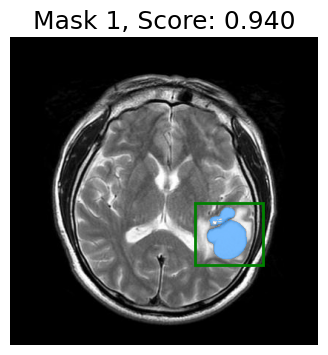

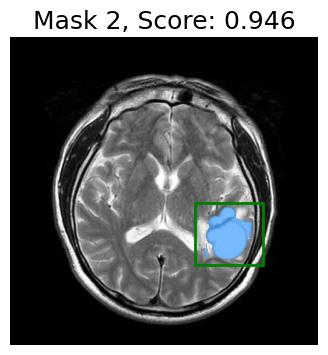

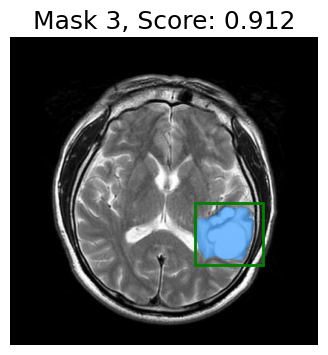

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(4,4))
    plt.imshow(original_image)
    show_mask(mask, plt.gca())
    show_box(input_box, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

### Prediction 2

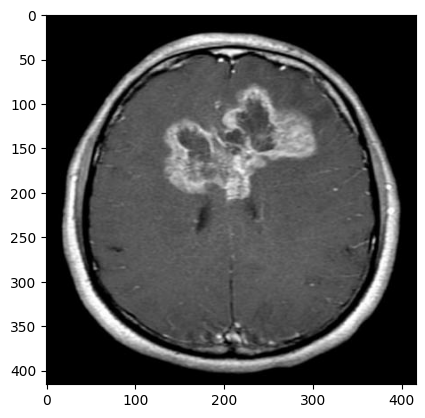

In [ ]:
# input image
original_image = cv2.imread('/content/test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

In [ ]:
## loading the custom trained YOLOv8m model
model = YOLO('/content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt')
# Perform inference
results = model('/content/test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg')
result = results[0]

for box in result.boxes:
  class_name = result.names[box.cls[0].item()]
  confidence = box.conf[0]
  confidence = math.ceil(confidence * 100)
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  if confidence > 90:
    x1, y1, x2, y2 = cords
    input_box = np.array(cords)
    print("input_box",input_box)

#########################################################################
# SAM Model starts here. Giving box as a input to SAM
#########################################################################

  # Load Model
  import sys
  sys.path.append("..")
  from segment_anything import sam_model_registry, SamPredictor

  sam_checkpoint = "sam_vit_h_4b8939.pth"
  model_type = "vit_h"
  device = "cuda"

  # Creating sam model
  sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
  sam.to(device=device)

  mask_predictor = SamPredictor(sam)
  mask_predictor.set_image(original_image)                            #   Calculates the image embeddings for the provided image, allowing
                                                                      #   masks to be predicted with the 'predict' method.

  # Generate masks with SAM
  # `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format.

  masks, scores, logits = mask_predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box,
      multimask_output=True,
      )



image 1/1 /content/test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg: 672x672 1 YES-TUMOR, 7.9ms
Speed: 17.9ms preprocess, 7.9ms inference, 11.1ms postprocess per image at shape (1, 3, 672, 672)


input_box [129  74 311 210]


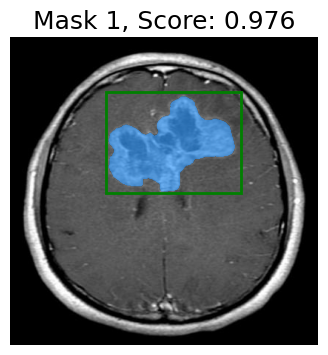

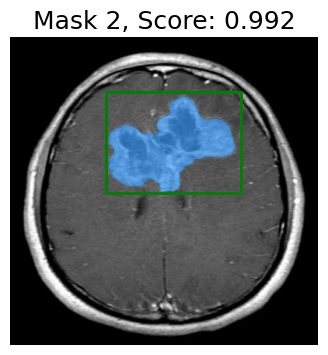

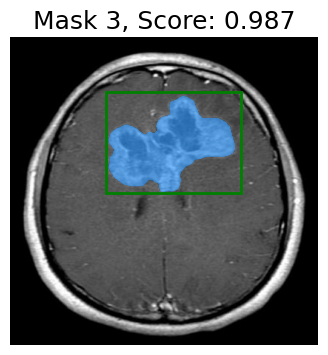

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(4,4))
    plt.imshow(original_image)
    show_mask(mask, plt.gca())
    show_box(input_box, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

### Prediction 3

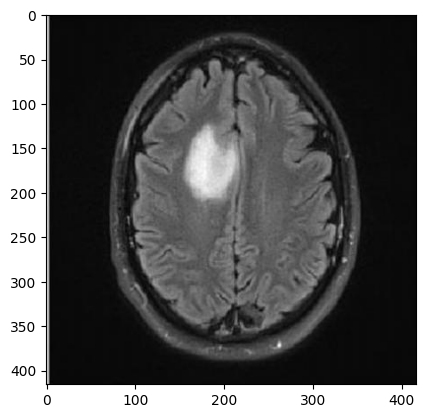

In [ ]:
# input image
original_image = cv2.imread('/content/test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

In [ ]:
## loading the custom trained YOLOv8m model
model = YOLO('/content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt')
# Perform inference
results = model('/content/test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg')
result = results[0]

for box in result.boxes:
  class_name = result.names[box.cls[0].item()]
  confidence = box.conf[0]
  confidence = math.ceil(confidence * 100)
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  if confidence > 90:
    x1, y1, x2, y2 = cords
    input_box = np.array(cords)
    print("input_box",input_box)


#########################################################################
# SAM Model starts here. Giving box as a input to SAM
#########################################################################

  # Load Model
  import sys
  sys.path.append("..")
  from segment_anything import sam_model_registry, SamPredictor

  sam_checkpoint = "sam_vit_h_4b8939.pth"
  model_type = "vit_h"
  device = "cuda"

  # Creating sam model
  sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
  sam.to(device=device)

  mask_predictor = SamPredictor(sam)
  mask_predictor.set_image(original_image)                            #   Calculates the image embeddings for the provided image, allowing
                                                                      #   masks to be predicted with the 'predict' method.

  # Generate masks with SAM
  # `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format.

  masks, scores, logits = mask_predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box,
      multimask_output=True,
      )



image 1/1 /content/test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg: 672x672 3 YES-TUMORs, 9.4ms
Speed: 11.8ms preprocess, 9.4ms inference, 12.6ms postprocess per image at shape (1, 3, 672, 672)


input_box [152 121 220 215]


In [ ]:
cords

[136, 47, 336, 290]

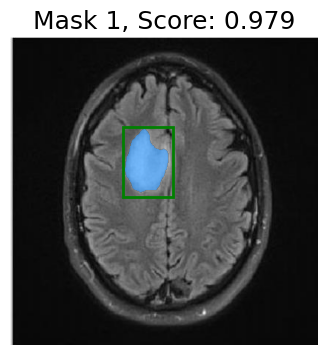

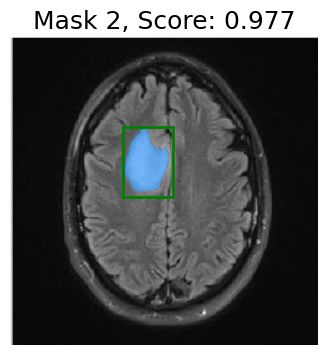

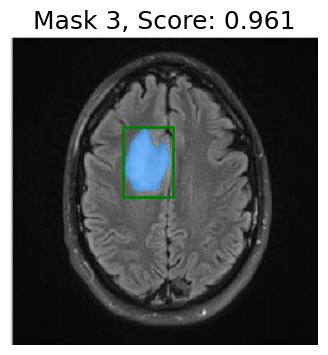

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(4,4))
    plt.imshow(original_image)
    show_mask(mask, plt.gca())
    show_box(input_box, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

### Prediction 4

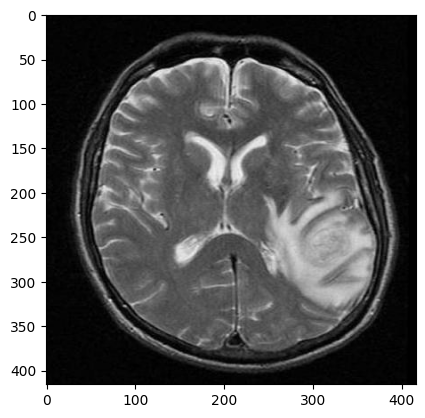

In [ ]:
# input image
original_image = cv2.imread('/content/test/images/Y61_jpg.rf.dc5523efe774025db6024db44e703c07.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

In [ ]:
## loading the custom trained YOLOv8m model
model = YOLO('/content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt')
# Perform inference
results = model('/content/test/images/Y61_jpg.rf.dc5523efe774025db6024db44e703c07.jpg')
result = results[0]

for box in result.boxes:
  class_name = result.names[box.cls[0].item()]
  confidence = box.conf[0]
  confidence = math.ceil(confidence * 100)
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  if confidence > 90:
    x1, y1, x2, y2 = cords
    input_box = np.array(cords)
    print("input_box",input_box)

#########################################################################
# SAM Model starts here. Giving box as a input to SAM
#########################################################################

  # Load Model
  import sys
  sys.path.append("..")
  from segment_anything import sam_model_registry, SamPredictor

  sam_checkpoint = "sam_vit_h_4b8939.pth"
  model_type = "vit_h"
  device = "cuda"

  # Creating sam model
  sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
  sam.to(device=device)

  mask_predictor = SamPredictor(sam)
  mask_predictor.set_image(original_image)                            #   Calculates the image embeddings for the provided image, allowing
                                                                      #   masks to be predicted with the 'predict' method.

  # Generate masks with SAM
  # `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format.

  masks, scores, logits = mask_predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box,
      multimask_output=True,
      )



image 1/1 /content/test/images/Y61_jpg.rf.dc5523efe774025db6024db44e703c07.jpg: 672x672 1 YES-TUMOR, 8.6ms
Speed: 25.4ms preprocess, 8.6ms inference, 11.3ms postprocess per image at shape (1, 3, 672, 672)


input_box [238 192 386 330]


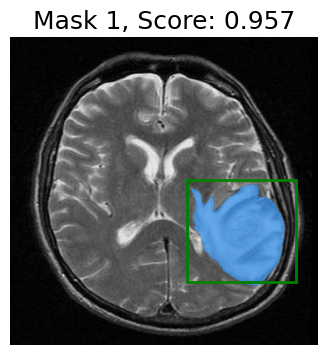

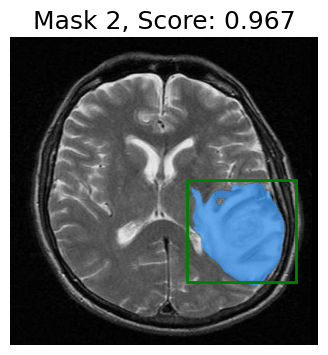

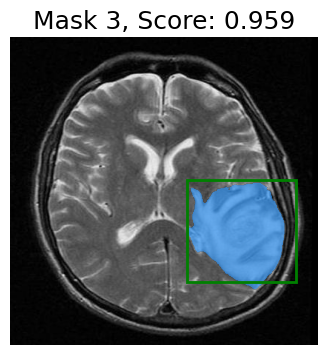

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(4,4))
    plt.imshow(original_image)
    show_mask(mask, plt.gca())
    show_box(input_box, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

In [ ]:
# #########################################################################
# # SAM Model starts here. Giving box as a input to SAM
# #########################################################################

# # Load Model
# import sys
# sys.path.append("..")
# from segment_anything import sam_model_registry, SamPredictor

# # Load the YOLO model
# model = YOLO('/content/drive/MyDrive/Brain_Tumor/New_Results/train/weights/best.pt')

# # Load the SAM model
# sam_checkpoint = "sam_vit_h_4b8939.pth"
# model_type = "vit_h"
# device = "cuda"
# sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# sam.to(device=device)

# # Function to perform segmentation on a single image
# def perform_segmentation(image_path):
#     original_image = cv2.imread(image_path)

#     # Perform inference with YOLO
#     results = model(image_path)
#     result = results[0]

#     for box in result.boxes:
#         class_name = result.names[box.cls[0].item()]
#         confidence = box.conf[0]
#         confidence = math.ceil(confidence * 100)
#         cords = box.xyxy[0].tolist()
#         cords = [round(x) for x in cords]
#         if confidence > 90:
#             input_box = np.array(cords)

#             # Create the SAM predictor
#             mask_predictor = SamPredictor(sam)
#             mask_predictor.set_image(original_image)

#             # Generate masks with SAM
#             masks, scores, logits = mask_predictor.predict(
#                 point_coords=None,
#                 point_labels=None,
#                 box=input_box,
#                 multimask_output=False,
#             )

#             for i, (mask, score) in enumerate(zip(masks, scores)):
#                 plt.figure(figsize=(4, 4))
#                 plt.imshow(original_image)
#                 show_mask(mask, plt.gca())
#                 show_box(input_box, plt.gca())
#                 plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
#                 plt.axis('off')
#                 plt.show()

# # Directory path containing the images
# directory_path = '/content/test/images'

# # Loop over each image in the directory and perform segmentation
# for filename in os.listdir(directory_path):
#     if filename.endswith('.jpg') or filename.endswith('.png'):
#         image_path = os.path.join(directory_path, filename)
#         perform_segmentation(image_path)

## Looping over test images to find mask


image 1/1 /content/test/images/Y29_jpg.rf.307e980d22d7cea7aed340d4f0edc9bc.jpg: 672x672 1 YES-TUMOR, 9.1ms
Speed: 4.2ms preprocess, 9.1ms inference, 8.9ms postprocess per image at shape (1, 3, 672, 672)

image 1/1 /content/test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg: 672x672 1 YES-TUMOR, 6.3ms
Speed: 2.5ms preprocess, 6.3ms inference, 1.5ms postprocess per image at shape (1, 3, 672, 672)

image 1/1 /content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg: 672x672 1 YES-TUMOR, 8.8ms
Speed: 3.3ms preprocess, 8.8ms inference, 2.0ms postprocess per image at shape (1, 3, 672, 672)

image 1/1 /content/test/images/Y7_jpg.rf.dbf9c26f4e96a64e4f3c824bd67bdf29.jpg: 672x672 1 YES-TUMOR, 15.5ms
Speed: 4.8ms preprocess, 15.5ms inference, 2.0ms postprocess per image at shape (1, 3, 672, 672)

image 1/1 /content/test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg: 672x672 1 YES-TUMOR, 11.0ms
Speed: 3.6ms preprocess, 11.0ms inference, 2.2ms postprocess per image at 

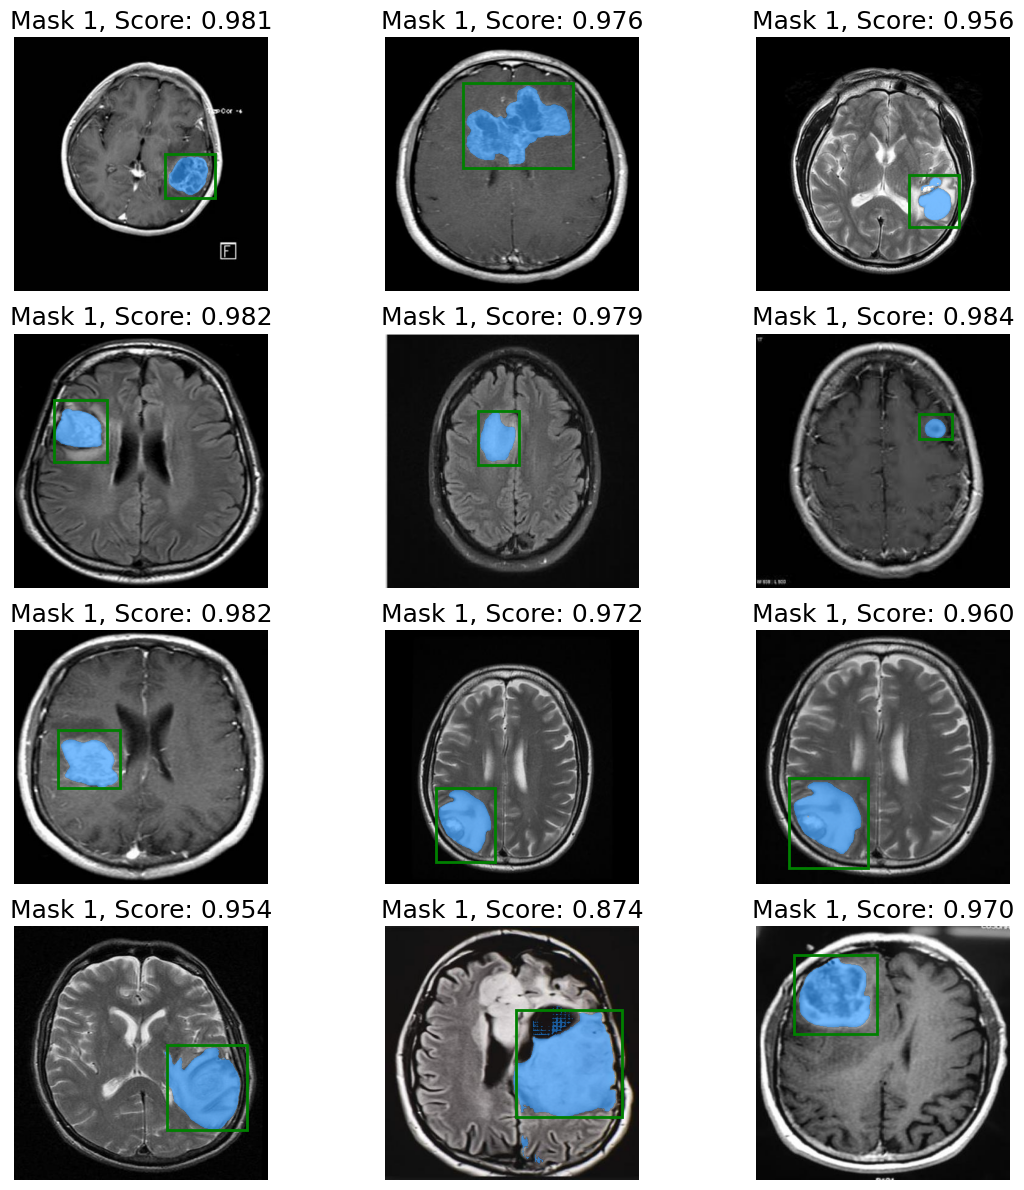

In [23]:
#########################################################################
# SAM Model starts here. Giving box as a input to SAM
#########################################################################

# Load Model
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor


# Load the YOLO model
model = YOLO('/content/drive/MyDrive/Brain_Tumor/New_Results/train3/weights/best.pt')

# Load the SAM model
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Function to perform segmentation on a single image
def perform_segmentation(image_path, plot_index):
    original_image = cv2.imread(image_path)

    # Perform inference with YOLO
    results = model(image_path)
    result = results[0]

    for box in result.boxes:
        class_name = result.names[box.cls[0].item()]
        confidence = box.conf[0]
        confidence = math.ceil(confidence * 100)
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        if confidence > 70:
            input_box = np.array(cords)

            # Create the SAM predictor
            mask_predictor = SamPredictor(sam)
            mask_predictor.set_image(original_image)

            # Generate masks with SAM
            masks, scores, logits = mask_predictor.predict(
                point_coords=None,
                point_labels=None,
                box=input_box,
                multimask_output=True,
            )

            # Calculate row and column indices for the subplot
            row = plot_index // num_cols
            col = plot_index % num_cols

            ax = axes[row, col]
            ax.imshow(original_image)
            show_mask(masks[0], ax)
            show_box(input_box, ax)
            ax.set_title(f"Mask 1, Score: {scores[0]:.3f}", fontsize=18)
            ax.axis('off')

# Directory path containing the images
directory_path = '/content/test/images'

# Get the number of columns for the grid plot
num_cols = 3

# Get the number of rows needed based on the number of images
num_images = len([f for f in os.listdir(directory_path) if f.endswith('.jpg') or f.endswith('.png')])
num_rows = math.ceil(num_images / num_cols)

# Create the grid plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Loop over each image in the directory and perform segmentation
for i, filename in enumerate(os.listdir(directory_path)):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(directory_path, filename)
        perform_segmentation(image_path, i)

# Remove empty subplots if the number of images is not a multiple of num_cols * num_rows
for i in range(num_images, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()